# Context
               It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

# Content
    The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

    It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.
    
# Inspiration
     Identify fraudulent credit card transactions.

###############################################################################################################################

### Importing the Library

In [1]:
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM

from pylab import rcParams
rcParams["figure.figsize"]=14,8
RANDOM_SEED=42
LABELS=["Normal","Fraud"]

from matplotlib.pyplot import figure

### Reading the Data

In [2]:
data=pd.read_csv("creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
data["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [5]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

### Visualizing the Data

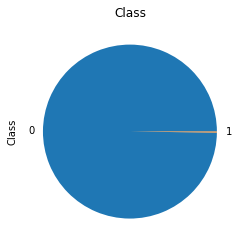

In [6]:
count=data["Class"].value_counts()
count.plot(kind='pie')
plt.title("Class")
plt.show()

### Building the model 

     Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable, although many more complex extensions exist. In regression analysis, logistic regression (or logit regression) is estimating the parameters of a logistic model (a form of binary regression).
     
# Logistic regression
     
     Logistic Regression was used in the biological sciences in early twentieth century. It was then used in many social science applications. Logistic Regression is used when the dependent variable(target) is categorical usually binary.
     
### Types of Logistic Regression
1. Binary Logistic Regression

The categorical response has only two 2 possible outcomes. Example: Spam or Not

2. Multinomial Logistic Regression

Three or more categories without ordering. Example: Predicting which food is preferred more (Veg, Non-Veg, Vegan)

3. Ordinal Logistic Regression

Three or more categories with ordering. Example: Movie rating from 1 to 5

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [8]:
dep="Class"
ind=data.columns.tolist()

In [9]:
ind.remove(dep)

In [10]:
ind.remove("Time")

In [11]:
y=data[dep]
x=data[ind]

### Spliting the Data 

     Now that you know what these datasets do, you might be looking for recommendations on how to split your dataset into Train, Validation and Test sets…This mainly depends on 2 things. First, the total number of samples in your data and second, on the actual model you are training.
     
    Some models need substantial data to train upon, so in this case you would optimize for the larger training sets. Models with very few hyperparameters will be easy to validate and tune, so you can probably reduce the size of your validation set, but if your model has many hyperparameters, you would want to have a large validation set as well(although you should also consider cross validation). 

In [12]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25)

In [13]:
#Printing shape of train and test data
print(xtrain.shape)
print(xtest.shape)

(213605, 29)
(71202, 29)


### Transforming Data
       It is rare to have collected data solely to make predictions. Consequently, the data you have available may not be in the right format or may require transformations to make it more useful. 

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
xtrain=scaler.fit_transform(xtrain)
xtest=scaler.transform(xtest)

### Initializing the Logistic Regression Model

In [15]:
#Initialize the instance of class LogisticRegression
model=LogisticRegression(random_state=0,solver="lbfgs")


#Fit the model in test Data
model.fit(xtrain,ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

### Predicting the model

In [16]:
pred=model.predict(xtest)

In [17]:
pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

### Finding Model Accuracy

       When you are building a predictive model, you need a way to evaluate the capability of the model on unseen data.This is typically done by estimating accuracy using data that was not used to train the model such as a test set, or using    cross validation. 

In case of classification analysis we use

1. Accuracy

2. Confusion matrix

3. Area of ROC AUC Curve

In [18]:
accuracy_score(pred,ytest)

0.9991573270413753

In [19]:
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71100
           1       0.88      0.48      0.62       102

   micro avg       1.00      1.00      1.00     71202
   macro avg       0.94      0.74      0.81     71202
weighted avg       1.00      1.00      1.00     71202



In [20]:
print(confusion_matrix(ytest,pred))

[[71093     7]
 [   53    49]]


In [21]:
from sklearn.metrics import roc_auc_score
roc_auc_score(ytest,pred)

0.7401468519897411

In [22]:
xtrain=pd.DataFrame(xtrain)
xtrain.head()

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,0.925511,0.749922,0.867881,0.360558,0.781039,0.240335,0.267809,0.786130,0.431196,0.512123,...,0.582655,0.562316,0.514197,0.616346,0.377820,0.565943,0.457986,0.416010,0.407176,0.000533
1,0.979002,0.737395,0.845680,0.221976,0.762570,0.231570,0.262641,0.782674,0.429343,0.521322,...,0.581306,0.560800,0.500323,0.620844,0.434844,0.556672,0.359949,0.416665,0.406061,0.000309
2,0.981360,0.728557,0.839329,0.271356,0.764597,0.256040,0.258645,0.790538,0.517831,0.500199,...,0.580494,0.568290,0.569130,0.622037,0.247748,0.498139,0.398137,0.418436,0.405307,0.005839
3,0.919653,0.731162,0.876508,0.153351,0.760704,0.244639,0.255940,0.794215,0.392333,0.519561,...,0.575061,0.560519,0.512235,0.614214,0.384339,0.543814,0.383049,0.414900,0.402584,0.000389
4,0.887323,0.705667,0.869386,0.193234,0.783312,0.216504,0.259805,0.787577,0.483716,0.479013,...,0.591296,0.564128,0.472747,0.632010,0.383076,0.561466,0.489841,0.412780,0.408696,0.007006


In [23]:
model.coef_

array([[  0.29029573,   0.23973207,  -1.27069257,   7.3445721 ,
          1.16496987,  -0.89979724,  -0.6394528 ,  -1.91774331,
         -2.57018366,  -3.93923537,   4.88478026,  -5.47046747,
         -2.38620883, -11.27789789,  -0.41761688,  -3.27100179,
         -1.95739946,   0.15893034,   0.82227677,   0.27896032,
          1.1943448 ,   0.97271069,  -0.25757272,  -0.79413884,
         -0.58761626,   0.56406625,  -0.36250205,   0.32160698,
         -0.25183332]])

# Credit Card Anamoly Detection

     Anomaly detection is the process of identifying unexpected items or events in data sets, which differ from the norm. And anomaly detection is often applied on unlabeled data which is known as unsupervised anomaly detection. Anomaly detection has two basic assumptions: Anomalies only occur very rarely in the data

### Isolation Forest Algorithm for Anamoly Detection

       One of the newest techniques to detect anomalies is called Isolation Forests. The algorithm is based on the fact that anomalies are data points that are few and different. As a result of these properties, anomalies are susceptible to a mechanism called isolation.

            This method is highly useful and is fundamentally different from all existing methods. It introduces the use of isolation as a more effective and efficient means to detect anomalies than the commonly used basic distance and density measures. Moreover, this method is an algorithm with a low linear time complexity and a small memory requirement. It builds a good performing model with a small number of trees using small sub-samples of fixed size, regardless of the size of a data set.
     
     
      The Isolation Forest algorithm isolates observations by randomly selecting a feature and then randomly selecting a split value between the maximum and minimum values of the selected feature. The logic argument goes: isolating anomaly observations is easier because only a few conditions are needed to separate those cases from the normal observations. On the other hand, isolating normal observations require more conditions. Therefore, an anomaly score can be calculated as the number of conditions required to separate a given observation.

### Local Outlier Factor

         The local outlier factor is based on a concept of a local density, where locality is given by k nearest neighbors, whose distance is used to estimate the density. By comparing the local density of an object to the local densities of its neighbors, one can identify regions of similar density, and points that have a substantially lower density than their neighbors. These are considered to be outliers.

           The local density is estimated by the typical distance at which a point can be "reached" from its neighbors. The definition of "reachability distance" used in LOF is an additional measure to produce more stable results within clusters.

In [24]:
fraud=data[data['Class']==1]
normal=data[data['Class']==0]

In [25]:
print(fraud.shape)
print(normal.shape)

(492, 31)
(284315, 31)


In [26]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [27]:
normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

We see that the mean of fraudlent transaction is higher than that of normal transactions.

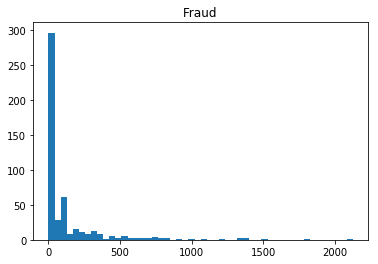

In [28]:
plt.hist(fraud.Amount,bins=50)
plt.title("Fraud")
plt.show()

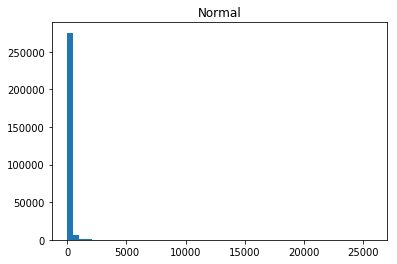

In [29]:
plt.hist(normal.Amount,bins=50)
plt.title("Normal")
plt.show()

We see for fraud transaction we have small small transactions.

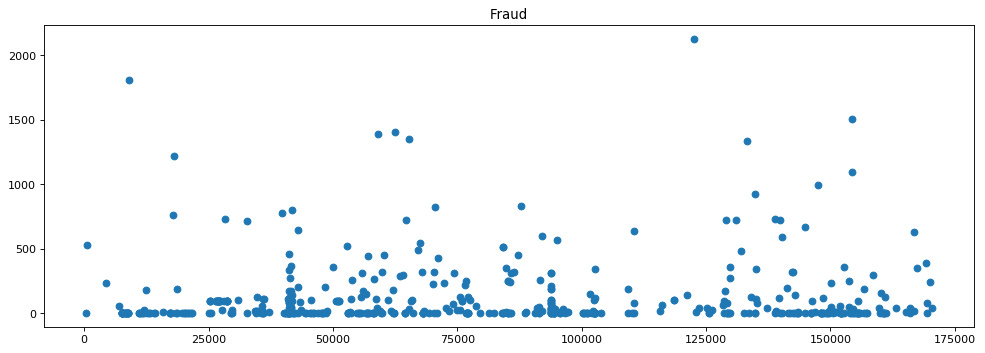

In [30]:
figure(num=None, figsize=(15, 5), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(fraud.Time,fraud.Amount)
plt.title("Fraud")
plt.show()

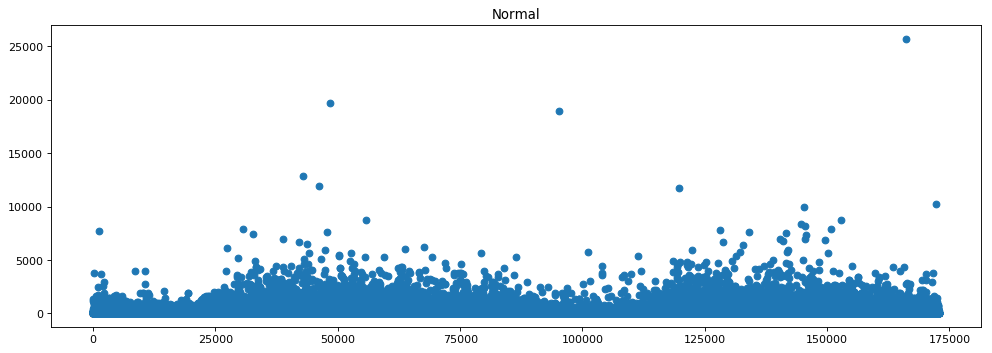

In [31]:
figure(num=None, figsize=(15, 5), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(normal.Time,normal.Amount)
plt.title("Normal")
plt.show()

We plot the time of transaction vs Amount by class.It say transaction amount is pretty small for fraud dataset.

In [32]:
## Take some sample of the data

data1= data.sample(frac = 0.1,random_state=1)

data1.shape

(28481, 31)

In [33]:
#Determine the number of fraud and valid transactions in the dataset

Fraud = data1[data1['Class']==1]

Valid = data1[data1['Class']==0]

outlier_fraction = len(Fraud)/float(len(Valid))

In [34]:
print(outlier_fraction)

print("Fraud Cases : {}".format(len(Fraud)))

print("Valid Cases : {}".format(len(Valid)))

0.0017234102419808666
Fraud Cases : 49
Valid Cases : 28432


In [35]:
#Create independent and Dependent Features
columns = data1.columns.tolist()
# Filter the columns to remove data we do not want 
columns = [c for c in columns if c not in ["Class","Time"]]
# Store the variable we are predicting 
target = "Class"
# Define a random state 
state = np.random.RandomState(42)
X = data1[columns]
Y = data1[target]
X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))
# Print the shapes of X & Y
print(X.shape)
print(Y.shape)

(28481, 29)
(28481,)


In [36]:
##Define the outlier detection methods

classifiers = {
    "Isolation Forest":IsolationForest(n_estimators=100, max_samples=len(X), 
                                       contamination=outlier_fraction,random_state=state, verbose=0),
    "Local Outlier Factor":LocalOutlierFactor(n_neighbors=20, algorithm='auto', 
                                              leaf_size=30, metric='minkowski',
                                              p=2, metric_params=None, contamination=outlier_fraction),
    "Support Vector Machine":OneClassSVM(kernel='rbf', degree=3, gamma=0.1,nu=0.05, 
                                         max_iter=-1, random_state=state)
   
}

In [37]:
n_outliers = len(Fraud)
for i, (clf_name,clf) in enumerate(classifiers.items()):
    #Fit the data and tag outliers
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(X)
        scores_prediction = clf.negative_outlier_factor_
    elif clf_name == "Support Vector Machine":
        clf.fit(X)
        y_pred = clf.predict(X)
    else:    
        clf.fit(X)
        scores_prediction = clf.decision_function(X)
        y_pred = clf.predict(X)
    #Reshape the prediction values to 0 for Valid transactions , 1 for Fraud transactions
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    n_errors = (y_pred != Y).sum()
    # Run Classification Metrics
    print("{}: {}".format(clf_name,n_errors))
    print("Accuracy Score :")
    print(accuracy_score(Y,y_pred))
    print("\n Confusion Matrix")
    print(confusion_matrix(Y,y_pred))
    print("Classification Report :")
    print(classification_report(Y,y_pred))

C:\Users\Gaurav\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:223: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
C:\Users\Gaurav\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:417: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


Isolation Forest: 77
Accuracy Score :
0.9972964432428637

 Confusion Matrix
[[28393    39]
 [   38    11]]
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.22      0.22      0.22        49

   micro avg       1.00      1.00      1.00     28481
   macro avg       0.61      0.61      0.61     28481
weighted avg       1.00      1.00      1.00     28481

Local Outlier Factor: 77
Accuracy Score :
0.9972964432428637

 Confusion Matrix
[[28393    39]
 [   38    11]]
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.22      0.22      0.22        49

   micro avg       1.00      1.00      1.00     28481
   macro avg       0.61      0.61      0.61     28481
weighted avg       1.00      1.00      1.00     28481



C:\Users\Gaurav\Anaconda3\lib\site-packages\sklearn\svm\classes.py:1177: DeprecationWarning: The random_state parameter is deprecated and will be removed in version 0.22.
  " be removed in version 0.22.", DeprecationWarning)


Support Vector Machine: 5222
Accuracy Score :
0.816649696288754

 Confusion Matrix
[[23245  5187]
 [   35    14]]
Classification Report :
              precision    recall  f1-score   support

           0       1.00      0.82      0.90     28432
           1       0.00      0.29      0.01        49

   micro avg       0.82      0.82      0.82     28481
   macro avg       0.50      0.55      0.45     28481
weighted avg       1.00      0.82      0.90     28481



### Observations :

Isolation Forest detected 77 errors versus Local Outlier Factor detecting 97 errors vs. SVM detecting 5222 errors
